In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# to make better chart
sns.set_style('whitegrid')
plt.figure(figsize = (10,6))
sns.despine(left=True, bottom=True)

# to avoid warnings
import warnings
warnings.filterwarnings('ignore')

# Pandas options
pd.set_option('display.max_colwidth', 1000, 'display.max_rows', None, 'display.max_columns', None)


<Figure size 720x432 with 0 Axes>

In [2]:
# load data dictionary
data_dic = pd.read_excel('LCDataDictionary.xlsx')

# view how many columns it descripes
print('The number of rows in the data dictionary is: ', data_dic.shape[0])

# view first 5 rows
data_dic.head()

The number of rows in the data dictionary is:  117


,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.


In [3]:
# load the data from 2007-2019
loans_2007_2019=pd.read_csv('LoanStats3a.csv', header=0) 

# view first row
display(loans_2007_2019.head(1))

# check the row and columns number
print('The number of rows and columns is: ', loans_2007_2019.shape)

print('The value of loan status in this dataset is: ')
# view the loan status in this dataset
loans_2007_2019['loan_status'].value_counts()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,NaN,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648.0,83.70%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.0,863.16,0.0,0.0,0.0,Jan-15,171.62,NaN,Jul-18,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


The number of rows and columns is:  (42538, 144)
The value of loan status in this dataset is: 


Fully Paid                                             34116
Charged Off                                             5670
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Name: loan_status, dtype: int64

In [4]:
loans_paid_or_default = loans_2007_2019.loc[loans_2007_2019['loan_status'].isin(['Fully Paid', 'Charged Off'])]


Text(0, 0.5, 'The number of loans for each status')

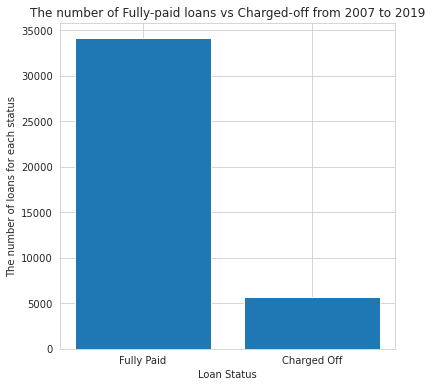

In [5]:
# code for plotting bar chart for loan status:
plt.figure(figsize=(6,6))
plt.bar(loans_paid_or_default['loan_status'].value_counts().index, loans_paid_or_default['loan_status'].value_counts().values)
plt.title('The number of Fully-paid loans vs Charged-off from 2007 to 2019')
plt.xlabel('Loan Status')
plt.ylabel('The number of loans for each status')

In [6]:
loans_paid_or_default['loan_status'].value_counts()

Fully Paid     34116
Charged Off     5670
Name: loan_status, dtype: int64

In [7]:
charged_off_rate = 5670/(5670+34116)

print('The charged off rate for all the loans from 2007 to 2019 is: ', charged_off_rate)

The charged off rate for all the loans from 2007 to 2019 is:  0.14251244156235862


In [8]:
# Convert 'Fully Paid' to 1, 'Charegd Off' to 0
status_replace = {
    "loan_status" : {
        "Fully Paid": 1,
        "Charged Off": 0,
    }
}

loans_paid_or_default = loans_paid_or_default.replace(status_replace)

# Remove % in int_rate and change the data type to float
loans_paid_or_default['int_rate'] = loans_paid_or_default['int_rate'].str.rstrip('%').astype('float')

# Aggregate the table by loan grade and calculate the count for each variabels
loans_grade_count= loans_paid_or_default.groupby('grade')['loan_amnt'].count()

# Aggregate the table by loan grade and calculate the average for each variabels
loans_grade_mean = loans_paid_or_default.groupby('grade').mean()

Text(0, 0.5, 'Average amount per loan (in USD dollars)')

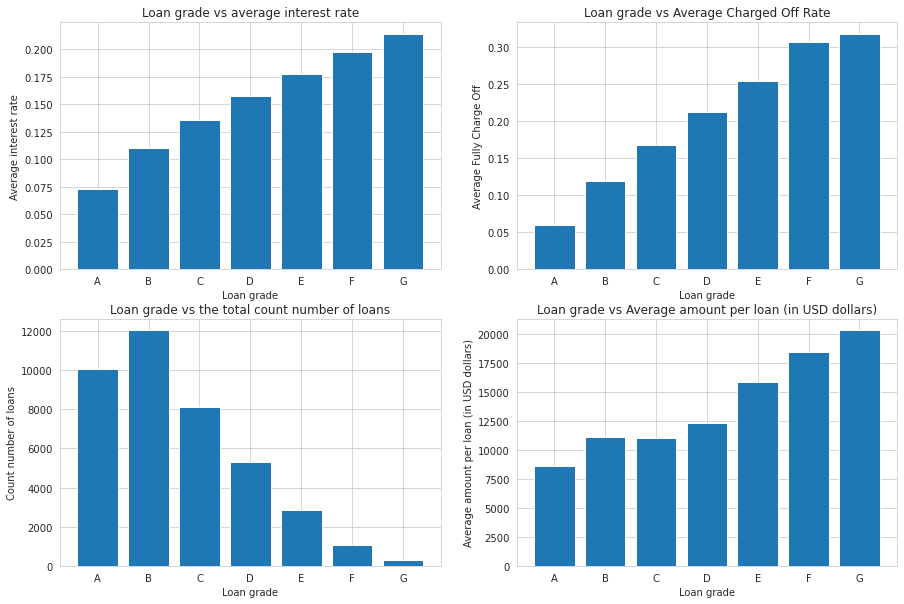

In [9]:
plt.figure(figsize = (15,10))

plt.subplot(2,2,1)
plt.bar(loans_grade_mean.index, (loans_grade_mean['int_rate']*0.01), )
plt.title('Loan grade vs average interest rate')
plt.xlabel('Loan grade')
plt.ylabel('Average interest rate')

plt.subplot(2,2,2)
plt.bar(loans_grade_mean.index, (1-loans_grade_mean['loan_status']))
plt.title('Loan grade vs Average Charged Off Rate')
plt.xlabel('Loan grade')
plt.ylabel('Average Fully Charge Off')

plt.subplot(2,2,3)
plt.bar(loans_grade_count.index, loans_grade_count.values)
plt.title('Loan grade vs the total count number of loans')
plt.xlabel('Loan grade')
plt.ylabel('Count number of loans')

plt.subplot(2,2,4)
plt.bar(loans_grade_mean.index, loans_grade_mean['loan_amnt'])
plt.title('Loan grade vs Average amount per loan (in USD dollars)')
plt.xlabel('Loan grade')
plt.ylabel('Average amount per loan (in USD dollars)')

In [10]:
loans_grade_charged_off = 1-loans_paid_or_default.groupby('grade')['loan_status'].mean()
loans_grade_interest = (loans_paid_or_default.groupby('grade')['int_rate'].mean())*0.01
loans_grade_charged_off = pd.DataFrame(loans_grade_charged_off)

loans_grade_charged_off.rename({'loan_status':'charged_off_rate'}, axis=1, inplace=True)
loans_grade_interest = pd.DataFrame(loans_grade_interest)
loans_grade_interest.rename({'int_rate':'interest_rate'}, axis=1, inplace=True)

investment = loans_grade_charged_off.join(loans_grade_interest) 
print(investment)

       charged_off_rate  interest_rate
grade                                 
A              0.059693       0.073353
B              0.119069       0.110216
C              0.167180       0.135536
D              0.212207       0.157234
E              0.253674       0.177173
F              0.306452       0.197530
G              0.317610       0.213953


In [11]:
investment.to_csv('investment.csv', index=False)

In [12]:
loans_2007_2019['issue_year'] = loans_2007_2019['issue_d'].astype(str).str[4:]

In [13]:
loans_2007_2019['issue_year']='20'+ loans_2007_2019['issue_year']

In [14]:
loans_2007_2019['issue_year']=loans_2007_2019['issue_year'].astype(int)

In [15]:
loans_2007_2019['issue_year']

0        2011
1        2011
2        2011
3        2011
4        2011
5        2011
6        2011
7        2011
8        2011
9        2011
10       2011
11       2011
12       2011
13       2011
14       2011
15       2011
16       2011
17       2011
18       2011
19       2011
20       2011
21       2011
22       2011
23       2011
24       2011
25       2011
26       2011
27       2011
28       2011
29       2011
30       2011
31       2011
32       2011
33       2011
34       2011
35       2011
36       2011
37       2011
38       2011
39       2011
40       2011
41       2011
42       2011
43       2011
44       2011
45       2011
46       2011
47       2011
48       2011
49       2011
50       2011
51       2011
52       2011
53       2011
54       2011
55       2011
56       2011
57       2011
58       2011
59       2011
60       2011
61       2011
62       2011
63       2011
64       2011
65       2011
66       2011
67       2011
68       2011
69       2011
70       2011
71    

In [16]:
loans_2008_2018 = loans_2007_2019[(loans_2007_2019['issue_year']!=2007)&
                                  (loans_2007_2019['issue_year']!=2011)]

# calculate the total number of loans issued for each year, # each row is one loan
loans_year_count = loans_2008_2018.groupby('issue_year')['loan_amnt'].count() 

# calculate the average amounts of loans (USD dolloars) from 2008 to 2018, each loan has different amount
loans_year_average = loans_2008_2018.groupby('issue_year')['loan_amnt'].mean()

# calculate the avegrage of 'Fully paid rate' from 2007 to 2016

# loans_paid_or_default['issue_year'] = pd.DatetimeIndex(loans_paid_or_default['issue_d']).year


In [17]:
loans_paid_or_default.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,1,n,NaN,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648.0,83.70%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,Jan-15,171.62,NaN,Jul-18,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,0,n,NaN,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br> Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687.0,9.40%,4.0,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,Apr-13,119.66,NaN,Oct-16,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [18]:
loans_paid_or_default['issue_year']=loans_paid_or_default['issue_d'].astype(str).str[4:]
loans_paid_or_default['issue_year']='20'+ loans_paid_or_default['issue_year']
loans_paid_or_default['issue_year']=loans_paid_or_default['issue_year'].astype(int)

In [19]:
loans_2007_2016 = loans_paid_or_default[(loans_paid_or_default['issue_year']!=2009)&
                                                      (loans_paid_or_default['issue_year']!=2010)&
                                                      (loans_paid_or_default['issue_year']!=2011)]

loans_2007_2016_loan_status = loans_2007_2016.groupby('issue_year')['loan_status'].mean()

loans_2007_2016_interest = loans_2007_2016.groupby('issue_year')['int_rate'].mean()

Text(0, 0.5, 'Average Interest Rate (%)')

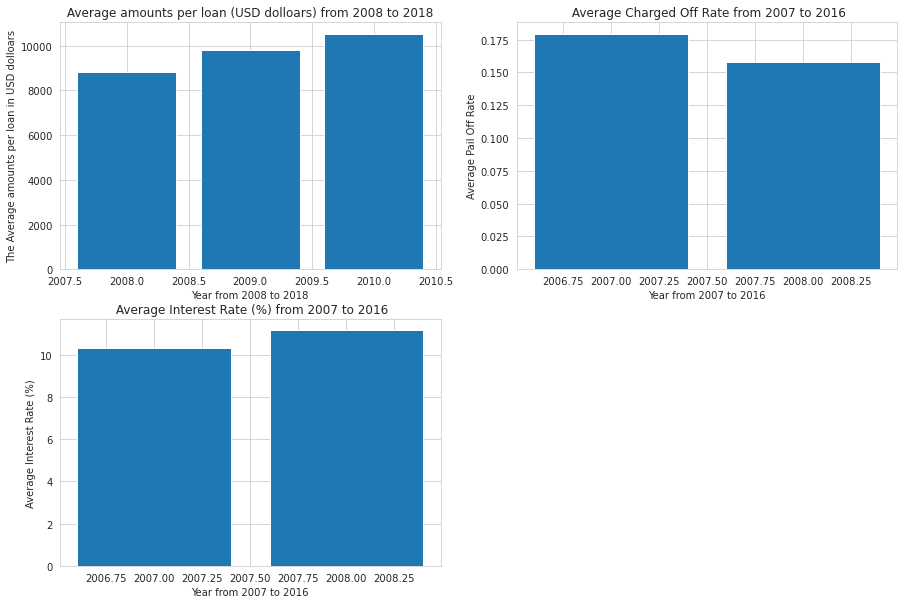

In [20]:
plt.figure(figsize = (15,10))

# Visualize the average amounts of per loan (USD dolloars) from 2008 to 2018 
plt.subplot(2,2,1)
plt.bar(loans_year_average.index, loans_year_average.values)
plt.title(' Average amounts per loan (USD dolloars) from 2008 to 2018 ')
plt.xlabel('Year from 2008 to 2018')
plt.ylabel('The Average amounts per loan in USD dolloars')

plt.subplot(2,2,2)
plt.bar(loans_2007_2016_loan_status.index, (1-loans_2007_2016_loan_status.values))
plt.title(' Average Charged Off Rate from 2007 to 2016')
plt.xlabel('Year from 2007 to 2016')
plt.ylabel('Average Pail Off Rate')

plt.subplot(2,2,3)
plt.bar(loans_2007_2016_interest.index, loans_2007_2016_interest.values)
plt.title(' Average Interest Rate (%) from 2007 to 2016')
plt.xlabel('Year from 2007 to 2016')
plt.ylabel('Average Interest Rate (%)')

In [21]:
 loans_year_count.values

array([    0,  2393,  5281, 12537])

In [22]:
loans_year_count.index

Int64Index([20, 2008, 2009, 2010], dtype='int64', name='issue_year')

In [23]:
loans_2007_2016_interest.index

Int64Index([2007, 2008], dtype='int64', name='issue_year')

In [24]:
loans_2011_current=loans_2007_2019[(loans_2007_2019['issue_year'] > 2010)  & (loans_2007_2019['issue_year'] <2012)]

In [25]:
loans_2011_current.shape

(21721, 145)

In [26]:
loans_2011_current['issue_year']

0        2011
1        2011
2        2011
3        2011
4        2011
5        2011
6        2011
7        2011
8        2011
9        2011
10       2011
11       2011
12       2011
13       2011
14       2011
15       2011
16       2011
17       2011
18       2011
19       2011
20       2011
21       2011
22       2011
23       2011
24       2011
25       2011
26       2011
27       2011
28       2011
29       2011
30       2011
31       2011
32       2011
33       2011
34       2011
35       2011
36       2011
37       2011
38       2011
39       2011
40       2011
41       2011
42       2011
43       2011
44       2011
45       2011
46       2011
47       2011
48       2011
49       2011
50       2011
51       2011
52       2011
53       2011
54       2011
55       2011
56       2011
57       2011
58       2011
59       2011
60       2011
61       2011
62       2011
63       2011
64       2011
65       2011
66       2011
67       2011
68       2011
69       2011
70       2011
71    

In [27]:
print('The number of rows and columns is: ', loans_2011_current.shape)

The number of rows and columns is:  (21721, 145)


In [28]:
# Remove all rows that contain have loan status other than Fully Paid or Charged Off 
loans_2007_2019_paid_or_default = loans_2007_2019.loc[loans_2007_2019['loan_status'].isin(['Fully Paid', 'Charged Off'])]

print('The number of rows and columns is: ', loans_2007_2019_paid_or_default.shape)

The number of rows and columns is:  (39786, 145)


In [29]:
status_replace = {
    "loan_status" : {
        "Fully Paid": 1,
        "Charged Off": 0,
    }
}

loans_2007_2019_paid_or_default = loans_2007_2019_paid_or_default.replace(status_replace)

In [30]:
features = loans_2007_2019_paid_or_default.drop('loan_status', axis=1)

target = loans_2007_2019_paid_or_default['loan_status']

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [32]:
X_test.to_csv('X_test.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

In [33]:
X_train.shape, y_train.shape


((31828, 144), (31828,))

In [34]:
X_train.head(1)

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,issue_year
7223,NaN,3600.0,3600.0,3600.0,36 months,6.03%,109.57,A,A1,Boston University,2 years,RENT,45000.0,Not Verified,Sep-11,n,NaN,"Borrower added on 09/15/11 > I plan to use these funds only to pay off all the high interest revolving credit card balances and avoid paying high interest on the same<br/>I have 100% on time payment history, no mortgages or foreclosures against my name, no delinquencies or bankruptcy and my expenses are around 60 - 65% of my monthly income<br/>I have budgeted $150 specifically to pay off the loan from lendingclub<br/>I am fully funded by Dept of Biomedical Engineering at Boston University as a Post Doc for the next three years and I intend to stay for the next three years in this position<br/>",credit_card,CreditCard Payoff,024xx,MA,11.52,0.0,Feb-05,0.0,NaN,NaN,11.0,0.0,3433.0,11.80%,22.0,f,0.0,0.0,3843.614369,3843.61,3600.0,243.61,0.0,0.0,0.0,Mar-13,2092.43,NaN,Oct-17,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2011


In [35]:
y_train = pd.DataFrame(y_train)


In [36]:
y_train.head()


,loan_status
7223,1
16431,1
17981,1
26311,1
14320,1


In [37]:
loans_2007_2019 = pd.concat([X_train, y_train], axis=1)


In [38]:
loans_2007_2019.shape

(31828, 145)

In [39]:
# check the percentage of misssing values in each columns
missing_fraction = loans_2007_2019.isnull().mean().sort_values(ascending=False)

print('The percentage of misssing values in each columns is: ', missing_fraction)

The percentage of misssing values in each columns is:  member_id                                     1.000000
num_tl_op_past_12m                            1.000000
num_tl_30dpd                                  1.000000
num_tl_120dpd_2m                              1.000000
num_sats                                      1.000000
num_rev_tl_bal_gt_0                           1.000000
num_rev_accts                                 1.000000
num_op_rev_tl                                 1.000000
num_il_tl                                     1.000000
num_bc_tl                                     1.000000
num_bc_sats                                   1.000000
num_actv_rev_tl                               1.000000
num_actv_bc_tl                                1.000000
num_accts_ever_120_pd                         1.000000
mths_since_recent_revol_delinq                1.000000
mths_since_recent_inq                         1.000000
mths_since_recent_bc_dlq                      1.000000
mths_since

In [40]:
# sort the columns that have more than 30% of missing value
drop_list = sorted(list(missing_fraction[missing_fraction>0.3].index))

# see how many columns we will drop
print('The number of the columns with more than 30% of missing values is: ', len(drop_list))


The number of the columns with more than 30% of missing values is:  91


In [41]:
# drop these columns 
loans_2007_2019 = loans_2007_2019.drop(drop_list, axis=1)

In [42]:
print('The number of rows and columns left is: ',loans_2007_2019.shape)


The number of rows and columns left is:  (31828, 54)


In [43]:
# drop the rows that are all NaNs 
loans_2007_2019.dropna(axis = 0, how = 'all', inplace=True)

# check the result
print('The number of rows and columns left is: ', loans_2007_2019.shape)

The number of rows and columns left is:  (31828, 54)


In [44]:
# check if any rows are duplicated
print('The number of duplicated rows is: ', loans_2007_2019.duplicated().sum())

The number of duplicated rows is:  0


In [45]:
# those are the columns we have identified to drop:
remove_col = ['funded_amnt','funded_amnt_inv','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv',
             'total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d',
             'last_pymnt_amnt']

# drop those columns
loans_2007_2019 = loans_2007_2019.drop(remove_col,axis=1)

# check the result
print('The number of rows and columns left is: ', loans_2007_2019.shape)

The number of rows and columns left is:  (31828, 41)


In [46]:
# get all the columns we want to examine
orig_columns = loans_2007_2019.columns

# create an empty list for the columns we want to drop
drop_columns = []

# write a for loop
for col in orig_columns:
    col_series = loans_2007_2019[col].dropna().unique()
    if len(col_series) == 1:
        # those columns only contain one unique value
        drop_columns.append(col)
        
# drop the columns
loans_2007_2019 = loans_2007_2019.drop(drop_columns, axis=1)

# show what we dropped
print('The columns that have only one unique value if removing NaN are: ', drop_columns)

print('\n')
# check the result
print('The number of rows and columns left is: ',loans_2007_2019.shape)

The columns that have only one unique value if removing NaN are:  ['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens', 'hardship_flag', 'disbursement_method']


The number of rows and columns left is:  (31828, 30)


In [47]:
# get all the columns we want to exam
orig_columns = loans_2007_2019.columns

# create an empty list for the columns we want to drop
drop_columns = []

# write a for loop
for col in orig_columns:
    
    # select the columns that offers very little variability
    if loans_2007_2019[col].value_counts(normalize=True, dropna=False).values[0]>0.9:

        # those columns won't have much predictive value. let's drop it.
        drop_columns.append(col)

# drop the columns
loans_2007_2019 = loans_2007_2019.drop(drop_columns, axis=1)

# show what we dropped
print('The columns that offers very little variability and need to be removed are: ', drop_columns)

print('\n')
# check the result
print('The number of rows and columns in 2007 to 2019 model data is: ',loans_2007_2019.shape)

The columns that offers very little variability and need to be removed are:  ['pub_rec', 'pub_rec_bankruptcies', 'debt_settlement_flag']


The number of rows and columns in 2007 to 2019 model data is:  (31828, 27)


In [48]:
loans_2007_2019.drop('issue_year', axis=1, inplace=True)
# check the result
print('The number of rows and columns in 2007 to 2019 model data is: ',loans_2007_2019.shape)

The number of rows and columns in 2007 to 2019 model data is:  (31828, 26)


In [49]:
# drop columns  'zip_code' and 'sub_grade'
loans_2007_2019 = loans_2007_2019.drop(['zip_code', 'sub_grade'],axis=1)

# check the result
print('The number of rows and columns left is: ', loans_2007_2019.shape)

The number of rows and columns left is:  (31828, 24)


In [50]:
# select all the columns that are object
object_col_df = loans_2007_2019.select_dtypes(include=['object'])
# view the first row
object_col_df.head(1)

,term,int_rate,grade,emp_title,emp_length,home_ownership,verification_status,issue_d,purpose,title,addr_state,earliest_cr_line,revol_util,last_credit_pull_d
7223,36 months,6.03%,A,Boston University,2 years,RENT,Not Verified,Sep-11,credit_card,CreditCard Payoff,MA,Feb-05,11.80%,Oct-17


In [51]:
loans_2007_2019.drop(['earliest_cr_line', 'last_credit_pull_d','issue_d'], axis=1, inplace=True)


In [52]:
# view what values in 'purpose' column
loans_2007_2019['purpose'].value_counts(dropna=False)

debt_consolidation    14925
credit_card            4066
other                  3214
home_improvement       2435
major_purchase         1737
small_business         1461
car                    1249
wedding                 750
medical                 566
moving                  448
vacation                311
house                   303
educational             276
renewable_energy         87
Name: purpose, dtype: int64

In [53]:
# check the number of unique value in the 'title' column
print('The number of unique value is: ', loans_2007_2019['title'].nunique())

print('\n')

# there are many values; show first 10 items in this clomun
print(loans_2007_2019['title'].value_counts(dropna=False).head(10))

The number of unique value is:  16101


Debt Consolidation           1747
Debt Consolidation Loan      1383
Personal Loan                 524
debt consolidation            409
Consolidation                 407
Credit Card Consolidation     292
Home Improvement              288
Debt consolidation            270
Small Business Loan           268
Personal                      245
Name: title, dtype: int64


In [54]:
# drop 'title' column
loans_2007_2019 = loans_2007_2019.drop('title', axis=1)

In [55]:
# Remove % in int_rate and change the data type to float
loans_2007_2019['int_rate'] = loans_2007_2019['int_rate'].str.rstrip('%').astype('float')

# Remove % in revol_util and change the data type to float
loans_2007_2019['revol_util'] = loans_2007_2019['revol_util'].str.rstrip('%').astype('float')

In [56]:
# see what are the values in 'emp_length' column
loans_2007_2019['emp_length'].value_counts(dropna=False)

10+ years    7071
< 1 year     3706
2 years      3537
3 years      3292
4 years      2753
5 years      2607
1 year       2569
6 years      1767
7 years      1451
8 years      1208
9 years      1010
NaN           857
Name: emp_length, dtype: int64

In [57]:
mapping_dict = {
    "emp_length": {
        "10+ years": 10,
        "9 years": 9,
        "8 years": 8,
        "7 years": 7,
        "6 years": 6,
        "5 years": 5,
        "4 years": 4,
        "3 years": 3,
        "2 years": 2,
        "1 year": 1,
        "< 1 year": 0
    }
}

loans_2007_2019 = loans_2007_2019.replace(mapping_dict)

In [58]:
# view the result
loans_2007_2019['emp_length'].value_counts(dropna=False)

10.0    7071
0.0     3706
2.0     3537
3.0     3292
4.0     2753
5.0     2607
1.0     2569
6.0     1767
7.0     1451
8.0     1208
9.0     1010
NaN      857
Name: emp_length, dtype: int64

In [59]:
# check the number of unique value in the 'emp_title' column
print('The number of unique value is: ', loans_2007_2019['emp_title'].nunique())

print('\n')
# show first 10 items in this clomun
print(loans_2007_2019['emp_title'].value_counts(dropna=False).head(10))

The number of unique value is:  23613


NaN                  1975
US Army               106
Bank of America        84
AT&T                   54
IBM                    50
Kaiser Permanente      47
Wells Fargo            45
USAF                   45
UPS                    42
US Air Force           39
Name: emp_title, dtype: int64


In [60]:
# drop 'emp_title' 
loans_2007_2019 = loans_2007_2019.drop('emp_title', axis=1)

In [61]:
# select all the columns that are object
object_col_df = loans_2007_2019.select_dtypes(include=['object'])
# view the first row
object_col_df.head()

,term,grade,home_ownership,verification_status,purpose,addr_state
7223,36 months,A,RENT,Not Verified,credit_card,MA
16431,60 months,D,MORTGAGE,Verified,home_improvement,OH
17981,36 months,C,RENT,Not Verified,small_business,CA
26311,36 months,A,RENT,Verified,credit_card,DC
14320,36 months,A,OWN,Verified,moving,NY


In [62]:
# check what are the percentage of each value in those columns using a for loop: 
for col in object_col_df.columns:
    print(loans_2007_2019[col].value_counts(normalize=True, dropna=False))

 36 months    0.731337
 60 months    0.268663
Name: term, dtype: float64
B    0.302218
A    0.254210
C    0.202966
D    0.134284
E    0.071007
F    0.026926
G    0.008389
Name: grade, dtype: float64
RENT        0.475745
MORTGAGE    0.444483
OWN         0.077353
OTHER       0.002356
NONE        0.000063
Name: home_ownership, dtype: float64
Not Verified       0.426009
Verified           0.323583
Source Verified    0.250408
Name: verification_status, dtype: float64
debt_consolidation    0.468927
credit_card           0.127749
other                 0.100980
home_improvement      0.076505
major_purchase        0.054575
small_business        0.045903
car                   0.039242
wedding               0.023564
medical               0.017783
moving                0.014076
vacation              0.009771
house                 0.009520
educational           0.008672
renewable_energy      0.002733
Name: purpose, dtype: float64
CA    0.178553
NY    0.095325
FL    0.072201
TX    0.068933
NJ    0.0

In [63]:
loans_2007_2019.to_csv('loans_2007_2019_with_NaN.csv', index=False)


Text(0, 0.5, 'The number of loans for each category')

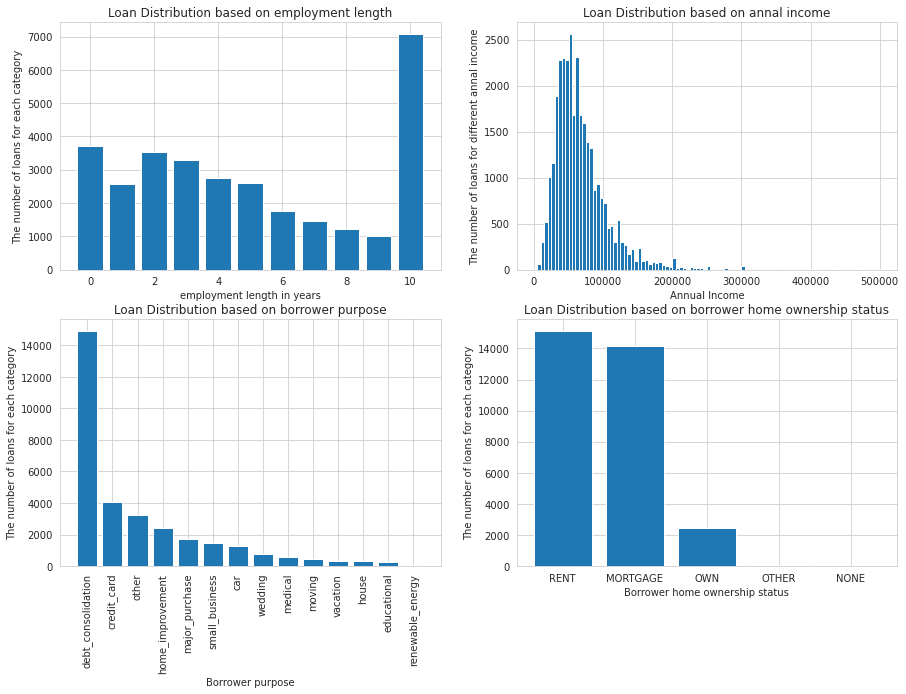

In [64]:
plt.figure(figsize=(15,10))

# code for plotting bar chart for employment length:
plt.subplot(2,2,1)
plt.bar(loans_2007_2019['emp_length'].value_counts().index, loans_2007_2019['emp_length'].value_counts().values)
plt.title('Loan Distribution based on employment length')
plt.xlabel('employment length in years')
plt.ylabel('The number of loans for each category')

# code for plotting histagram for annal income:
plt.subplot(2,2,2) # noted that there are some extremely high income can make our plot high screwed, that is why I set a range
plt.hist(loans_2007_2019['annual_inc'], bins=100, range=(0, 500000)) 
plt.title('Loan Distribution based on annal income')
plt.xlabel('Annual Income')
plt.ylabel('The number of loans for different annal income')

# code for plotting bar chart for purpose:
plt.subplot(2,2,3)
plt.bar(loans_2007_2019['purpose'].value_counts().index, loans_2007_2019['purpose'].value_counts().values)
plt.title('Loan Distribution based on borrower purpose')
plt.xlabel('Borrower purpose')
plt.xticks(rotation=90)
plt.ylabel('The number of loans for each category')

# code for plotting bar chart 
plt.subplot(2,2,4)
plt.bar(loans_2007_2019['home_ownership'].value_counts().index, loans_2007_2019['home_ownership'].value_counts().values)
plt.title('Loan Distribution based on borrower home ownership status')
plt.xlabel('Borrower home ownership status')
plt.ylabel('The number of loans for each category')

In [65]:
# check the percentage of misssing values and sort the data
missing_fraction = loans_2007_2019.isnull().mean().sort_values(ascending=False)
print('The column name and the percentage of missing values is: ')
print('\n')
print(missing_fraction[missing_fraction>0])

The column name and the percentage of missing values is: 


emp_length    0.026926
revol_util    0.001320
dtype: float64


In [66]:
# check statistical information for this column
loans_2007_2019.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'revol_bal', 'revol_util', 'total_acc', 'loan_status'],
      dtype='object')

In [67]:
loans_2007_2019 = loans_2007_2019.dropna(axis=0)

In [68]:
# double check if we have any missing values left. 
print('Is there any cloumns that contain missing value: ', loans_2007_2019.isna().sum().any())
print('The number of rows and columns left is: ', loans_2007_2019.shape)

Is there any cloumns that contain missing value:  False
The number of rows and columns left is:  (30931, 19)


In [69]:
# write out the data and save it to a new file
loans_2007_2019.to_csv('loans_2007_2019_cleaned.csv', index=False)